# Lab 03 : GAN with CNN - exercise

The goal is to implement a GAN architecture with CNNs to generate new MNIST images.</br>

In [2]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS4243_codes/codes/labs_lecture15/lab03_GAN_CNN'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/GAN/new_codes/labs_lecture15/
/content/gdrive/My Drive/GAN/new_codes/labs_lecture15


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import utils
import time

### GPU is required to train GAN

In [4]:
device= torch.device("cuda")
#device= torch.device("cpu")
print(device)

cuda


In [5]:
# Libraries
import matplotlib.pyplot as plt
import logging
logging.getLogger().setLevel(logging.CRITICAL) # remove warnings

### MNIST dataset 

In [6]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
print(train_data.size())

torch.Size([60000, 28, 28])


### Network architecture

In [7]:
# Global constants
# n : nb of pixels along each spatial dimension
# dz : latent dimension
# d : hidden dimension
# b : batch size
n = train_data.size(1)
dz = n
d = 128
b = 64


In [8]:
# Define the generator and discriminator networks
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        # COMPLETE HERE
        self.linear1 = 
        self.bn1 = 
        self.linear2 = 
        self.bn2 = 
        self.tconv1 = 
        self.bn3 = 
        self.tconv2 = 
    def forward(self, z): 
        # COMPLETE HERE
        g_z = 
        return g_z

class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        # COMPLETE HERE
        self.conv1 = 
        self.bn1 = 
        self.conv2 = 
        self.bn2 = 
        self.linear1 = 
        self.bn3 = 
        self.linear2 = 
    def forward(self, h): 
        # COMPLETE HERE
        d_h = 
        return d_h

# Instantiate the network
net_g = generator()
net_g = net_g.to(device)
print(net_g)
utils.display_num_param(net_g) 
net_d = discriminator()
net_d = net_d.to(device)
print(net_d)
utils.display_num_param(net_d) 

# Test the forward pass, backward pass and gradient update with a single batch
init_lr = 0.001
optimizer_g = torch.optim.Adam(net_g.parameters(), lr=init_lr)
optimizer_d = torch.optim.Adam(net_d.parameters(), lr=init_lr)

b = 10
idx = torch.LongTensor(b).random_(0,60000)
x = train_data[idx,:,:].view(b,-1) # [b, n**2]
x = x.to(device)
print(x.size())

z = torch.rand(b, dz) # [b, dz]
label_real = torch.ones(b, 1)
label_fake = torch.zeros(b, 1)
z = z.to(device)
label_real = label_real.to(device)
label_fake = label_fake.to(device)

# update g
optimizer_g.zero_grad()
g_z = net_g(z) # [b, 1, n, n]
g_fake = net_d(g_z) # [b, 1]
print(g_z.size())
print(g_fake.size())
loss_fake = nn.BCELoss()(g_fake, label_real)
loss = loss_fake
loss.backward()
optimizer_g.step()

# update d
optimizer_d.zero_grad()
g_z = net_g(z) # [b, 1, n, n]
d_real = net_d(x.view(-1,n,n).unsqueeze(1)) # [b, 1]
g_fake = net_d(g_z) # [b, 1]
print(d_real.size())
print(g_z.size())
print(g_fake.size())
loss_real = nn.BCELoss()(d_real, label_real)
loss_fake = nn.BCELoss()(g_fake, label_fake)
loss = loss_real + loss_fake
loss.backward()
optimizer_d.step()


generator(
  (linear1): Linear(in_features=28, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=128, out_features=6272, bias=True)
  (bn2): BatchNorm1d(6272, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv1): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv2): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)
There are 1090177 (1.09 million) parameters in this neural network
discriminator(
  (conv1): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

generator(
  (linear1): Linear(in_features=28, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=128, out_features=6272, bias=True)
  (bn2): BatchNorm1d(6272, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv1): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv2): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)
There are 1090177 (1.09 million) parameters in this neural network
discriminator(
  (conv1): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

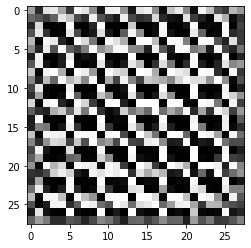

epoch= 1 	 time= 0.11404232184092204 min 	 lr= 0.0002 	 loss_d= 0.8675262331962585 	 loss_g= 1.1490628504753113
epoch= 2 	 time= 0.1664282480875651 min 	 lr= 0.0002 	 loss_d= 0.6184659330546856 	 loss_g= 1.4664217406511306
epoch= 3 	 time= 0.21873865524927774 min 	 lr= 0.0002 	 loss_d= 0.45874700620770453 	 loss_g= 1.765455704331398
epoch= 4 	 time= 0.27108608881632484 min 	 lr= 0.0002 	 loss_d= 0.3462468495965004 	 loss_g= 2.059255877137184
epoch= 5 	 time= 0.3235162456830343 min 	 lr= 0.0002 	 loss_d= 0.45708316907286645 	 loss_g= 2.022261210680008


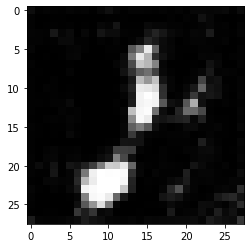

epoch= 6 	 time= 0.37770801385243735 min 	 lr= 0.0002 	 loss_d= 0.6629250937700272 	 loss_g= 1.6796365517377854
epoch= 7 	 time= 0.43014948765436806 min 	 lr= 0.0002 	 loss_d= 0.6487730947136879 	 loss_g= 1.7121999830007553
epoch= 8 	 time= 0.48259220520655316 min 	 lr= 0.0002 	 loss_d= 0.5803956943750381 	 loss_g= 1.8034185081720353
epoch= 9 	 time= 0.5348863641421 min 	 lr= 0.0002 	 loss_d= 0.5193407626450062 	 loss_g= 1.920608561038971
epoch= 10 	 time= 0.5871298154195149 min 	 lr= 0.0002 	 loss_d= 0.523167906999588 	 loss_g= 1.9613656616210937


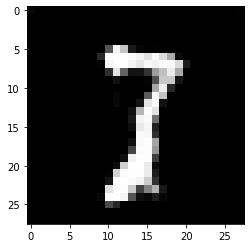

epoch= 11 	 time= 0.6412769039471944 min 	 lr= 0.0002 	 loss_d= 0.5126203189790249 	 loss_g= 1.9808249759674073
epoch= 12 	 time= 0.693615440527598 min 	 lr= 0.0002 	 loss_d= 0.5113899236917496 	 loss_g= 2.0413214498758316
epoch= 13 	 time= 0.7459509293238322 min 	 lr= 0.0002 	 loss_d= 0.5122920051217079 	 loss_g= 2.055645621418953
epoch= 14 	 time= 0.798334010442098 min 	 lr= 0.0002 	 loss_d= 0.5094601514935494 	 loss_g= 2.0897596746683123
epoch= 15 	 time= 0.8506154775619507 min 	 lr= 0.0002 	 loss_d= 0.48630222991108896 	 loss_g= 2.1222428596019745


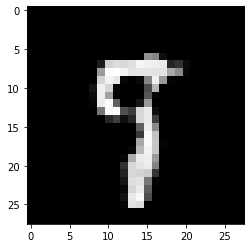

epoch= 16 	 time= 0.9047309438387553 min 	 lr= 0.0002 	 loss_d= 0.4772301436960697 	 loss_g= 2.182447453737259
epoch= 17 	 time= 0.9570817192395528 min 	 lr= 0.0002 	 loss_d= 0.47500776827335356 	 loss_g= 2.2307691287994387
epoch= 18 	 time= 1.0093601584434508 min 	 lr= 0.0002 	 loss_d= 0.4418306229263544 	 loss_g= 2.27767802298069
epoch= 19 	 time= 1.0618088960647583 min 	 lr= 0.0002 	 loss_d= 0.47673151925206186 	 loss_g= 2.281624621152878
epoch= 20 	 time= 1.1142009814580283 min 	 lr= 0.0002 	 loss_d= 0.4402063699066639 	 loss_g= 2.3484112334251406


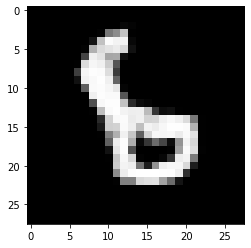

epoch= 21 	 time= 1.1684712886810302 min 	 lr= 0.0002 	 loss_d= 0.4505954070389271 	 loss_g= 2.3570852863788603
epoch= 22 	 time= 1.2207146883010864 min 	 lr= 0.0002 	 loss_d= 0.4140587581694126 	 loss_g= 2.4561881029605868
epoch= 23 	 time= 1.27299013932546 min 	 lr= 0.0002 	 loss_d= 0.4113017576932907 	 loss_g= 2.46564013838768
epoch= 24 	 time= 1.3253573099772136 min 	 lr= 0.0002 	 loss_d= 0.4171637931466103 	 loss_g= 2.4907330709695814
epoch= 25 	 time= 1.3776878197987874 min 	 lr= 0.0002 	 loss_d= 0.414295908883214 	 loss_g= 2.5185720616579057


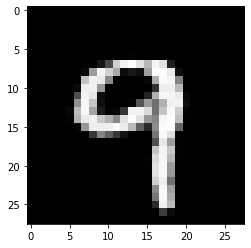

epoch= 26 	 time= 1.4319473346074423 min 	 lr= 0.0002 	 loss_d= 0.3801093950867653 	 loss_g= 2.585092104077339
epoch= 27 	 time= 1.484362244606018 min 	 lr= 0.0002 	 loss_d= 0.40283982425928117 	 loss_g= 2.6105793637037276
epoch= 28 	 time= 1.5366063515345256 min 	 lr= 0.0002 	 loss_d= 0.3905118613690138 	 loss_g= 2.5816835153102873
epoch= 29 	 time= 1.5889972567558288 min 	 lr= 0.0002 	 loss_d= 0.3792824795097113 	 loss_g= 2.698072910904884
epoch= 30 	 time= 1.6412886063257852 min 	 lr= 0.0002 	 loss_d= 0.3600621547549963 	 loss_g= 2.685105796456337


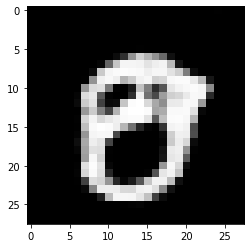

epoch= 31 	 time= 1.6954110225041708 min 	 lr= 0.0002 	 loss_d= 0.3664681363105774 	 loss_g= 2.7349915146827697
epoch= 32 	 time= 1.7477126161257426 min 	 lr= 0.0002 	 loss_d= 0.35487633228302 	 loss_g= 2.8072852057218554
epoch= 33 	 time= 1.799976929028829 min 	 lr= 0.0002 	 loss_d= 0.3514364829659462 	 loss_g= 2.801111674308777
epoch= 34 	 time= 1.8523336807886759 min 	 lr= 0.0002 	 loss_d= 0.3484470880776644 	 loss_g= 2.820296230316162
epoch= 35 	 time= 1.9045540769894918 min 	 lr= 0.0002 	 loss_d= 0.34110819652676583 	 loss_g= 2.8823353016376494


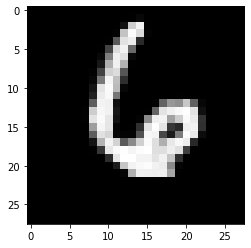

epoch= 36 	 time= 1.9588371992111206 min 	 lr= 0.0002 	 loss_d= 0.3444041819125414 	 loss_g= 2.912381192445755
epoch= 37 	 time= 2.0112187306086224 min 	 lr= 0.0002 	 loss_d= 0.3406694023311138 	 loss_g= 2.8970398062467577
epoch= 38 	 time= 2.063562985261281 min 	 lr= 0.0002 	 loss_d= 0.3241869913041592 	 loss_g= 2.9901808977127073
epoch= 39 	 time= 2.115954287846883 min 	 lr= 0.0002 	 loss_d= 0.33449052408337593 	 loss_g= 2.955472331047058
epoch= 40 	 time= 2.16833868821462 min 	 lr= 0.0002 	 loss_d= 0.3167698913812637 	 loss_g= 3.026702938079834


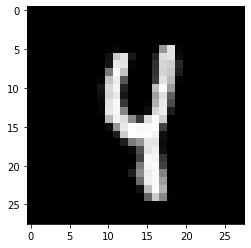

epoch= 41 	 time= 2.2224649747212726 min 	 lr= 0.0002 	 loss_d= 0.3326750534027815 	 loss_g= 2.9871851402521132
epoch= 42 	 time= 2.2749479969342548 min 	 lr= 0.0002 	 loss_d= 0.3216196151450276 	 loss_g= 3.3050447309017184
epoch= 43 	 time= 2.3272827506065368 min 	 lr= 0.0002 	 loss_d= 0.21794066652655603 	 loss_g= 3.426167768239975
epoch= 44 	 time= 2.379611337184906 min 	 lr= 0.0002 	 loss_d= 0.32520062152296303 	 loss_g= 3.0814367532730103
epoch= 45 	 time= 2.432189889748891 min 	 lr= 0.0002 	 loss_d= 0.322549035847187 	 loss_g= 3.089720727801323


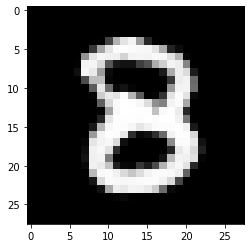

epoch= 46 	 time= 2.4865426421165466 min 	 lr= 0.0002 	 loss_d= 0.30994871400296686 	 loss_g= 3.1253937977552413
epoch= 47 	 time= 2.5389423449834188 min 	 lr= 0.0002 	 loss_d= 0.2928525826707482 	 loss_g= 3.146556478738785
epoch= 48 	 time= 2.591360358397166 min 	 lr= 0.0002 	 loss_d= 0.3052590522915125 	 loss_g= 3.185574791431427
epoch= 49 	 time= 2.6437300205230714 min 	 lr= 0.0002 	 loss_d= 0.2951494484767318 	 loss_g= 3.1915162682533262


In [9]:
# Training loop
net_g = generator()
net_g = net_g.to(device)
print(net_g)
utils.display_num_param(net_g) 
net_d = discriminator()
net_d = net_d.to(device)
print(net_d)
utils.display_num_param(net_d) 

# Optimizer
init_lr = 0.0002
optimizer_g = torch.optim.Adam(net_g.parameters(), lr=init_lr, betas=(0.5, 0.999))
optimizer_d = torch.optim.Adam(net_d.parameters(), lr=init_lr, betas=(0.5, 0.999))

nb_batch = 200 # GPU # Nb of mini-batches per epoch
b = 64  # Batch size

start=time.time()
for epoch in range(50):

    label_real = torch.ones(b, 1)
    label_fake = torch.zeros(b, 1)
    label_real = label_real.to(device)
    label_fake = label_fake.to(device)

    running_loss_d = 0.0
    running_loss_g = 0.0
    num_batches = 0
    
    for _ in range(nb_batch):
        
        # FORWARD AND BACKWARD PASS
        idx = torch.LongTensor(b).random_(0,60000)
        x = train_data[idx,:,:].view(b,-1) # [b, n**2]
        x = x.to(device)
        z = torch.rand(b, dz) # Uniform distribution # [b, dz]
        z = z.to(device)
        
        # update d
        optimizer_d.zero_grad()
        g_z = net_g(z) # [b, 1, n, n]
        d_real = net_d(x.view(-1,n,n).unsqueeze(1)) # [b, 1]
        g_fake = net_d(g_z) # [b, 1]
        loss_real = nn.BCELoss()(d_real, label_real)
        loss_fake = nn.BCELoss()(g_fake, label_fake)
        loss = loss_real + loss_fake
        loss_d = loss.detach().item()
        loss.backward()
        optimizer_d.step()    
        
        # update g
        optimizer_g.zero_grad()
        g_z = net_g(z) # [b, 1, n, n]
        g_fake = net_d(g_z) # [b, 1]
        loss_fake = nn.BCELoss()(g_fake, label_real)
        loss = loss_fake
        loss_g = loss.detach().item()
        loss.backward()
        optimizer_g.step() 

        # COMPUTE STATS
        running_loss_d += loss_d
        running_loss_g += loss_g
        num_batches += 1        
    
    # AVERAGE STATS THEN DISPLAY
    total_loss_d = running_loss_d/ num_batches
    total_loss_g = running_loss_g/ num_batches
    elapsed = (time.time()-start)/60
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t lr=', init_lr  ,'\t loss_d=', total_loss_d ,'\t loss_g=', total_loss_g )

    if not epoch%5:
        plt.imshow(g_z.view(b,n,n).detach().cpu()[0,:,:], cmap='gray'); plt.show() 
    

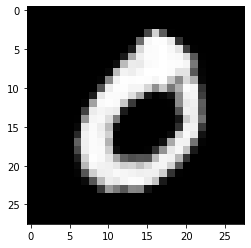

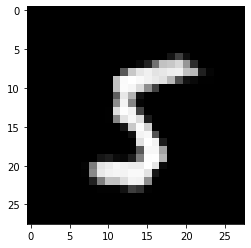

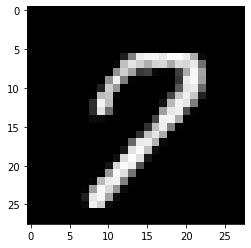

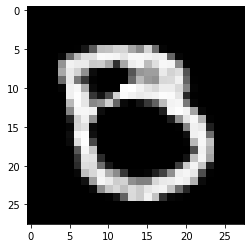

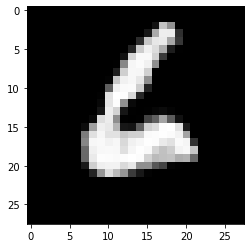

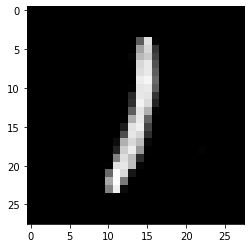

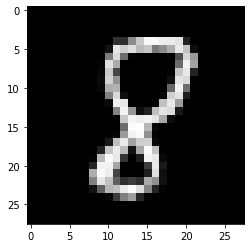

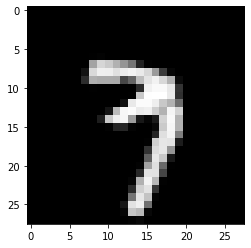

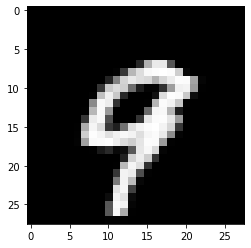

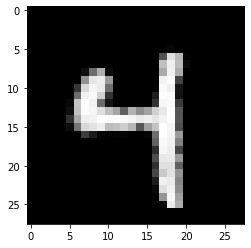

In [10]:
# Generate a few images
b = 10
z = torch.rand(b, dz) # Uniform distribution 
z = z.to(device)
g_z = net_g(z).view(b,n,n).detach().cpu()
for k in range(b):
    plt.imshow(g_z[k,:,:], cmap='gray'); plt.show() 
  